BSCS2A - Group Members:

1.   Coladilla, Jandrei V.
2.   Vargas, Mairene Rose B.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data1 = pd.read_csv('Visitor_Logs.csv', encoding = 'latin-1')
data2 = pd.read_csv('Security_Camera_Logs.csv', encoding = 'latin-1')
data3 = pd.read_csv('Inventory_Records.csv', encoding = 'latin-1')
data4 = pd.read_csv('Email_Exchanges.csv', encoding = 'latin-1')

**Visitor Logs**

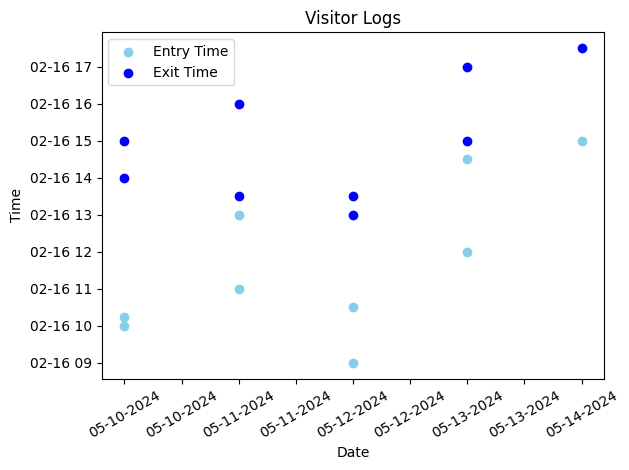

In [3]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Entry Time'] = pd.to_datetime(data1['Entry Time'])
data1['Exit Time'] = pd.to_datetime(data1['Exit Time'])

plt.scatter(data1['Date'], data1['Entry Time'], color='skyblue', label='Entry Time')
plt.scatter(data1['Date'], data1['Exit Time'], color='blue', label='Exit Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

plt.title('Visitor Logs')
plt.xlabel('Date')
plt.ylabel('Time')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

**Security Camera Logs**

In [4]:
print("\nNotable Observations:")
for observation in data2['Notable Observations']:
    print(observation)


Notable Observations:
Shadowy figure spotted
-
Visitor lingered unusually long
Suspicious behavior observed
Group entered
Unattended bag spotted
-
Visitor taking photos
Visitor avoided cameras


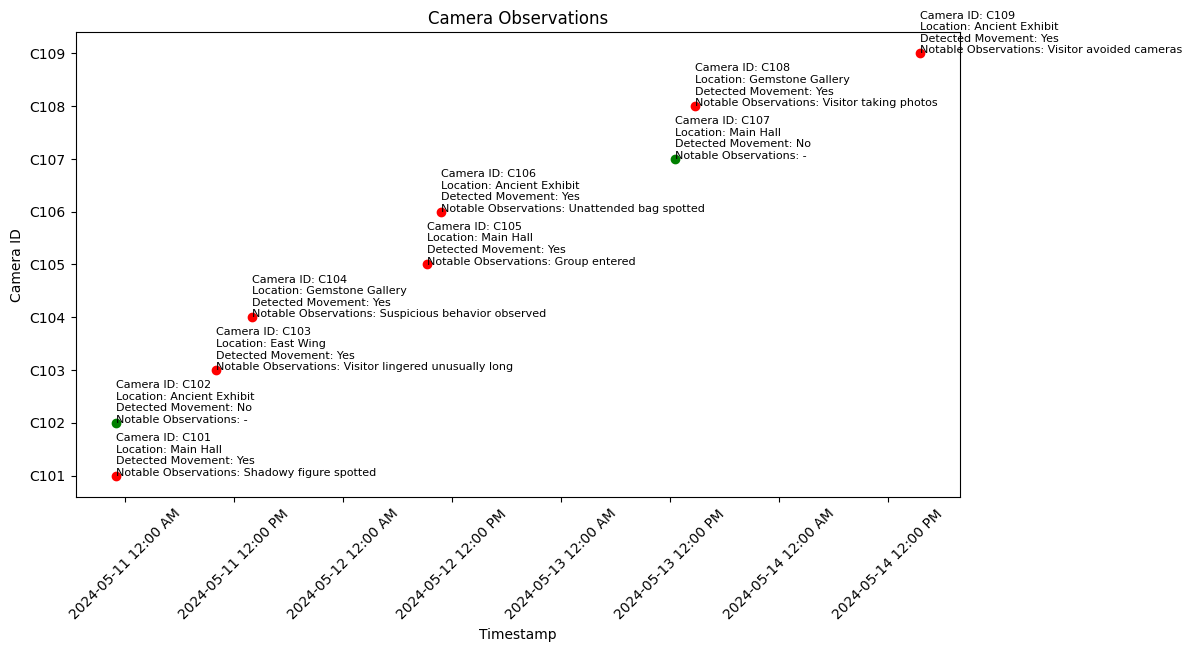

In [5]:
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])
plt.figure(figsize=(12, 6))
for idx, row in data2.iterrows():
    if row['Detected Movement'] == 'Yes':
        plt.scatter(row['Timestamp'], row['Camera ID'], color='red', label='Detected Movement')
    else:
        plt.scatter(row['Timestamp'], row['Camera ID'], color='green')
    plt.text(row['Timestamp'], row['Camera ID'], f"Camera ID: {row['Camera ID']}\nLocation: {row['Location']}\nDetected Movement: {row['Detected Movement']}\nNotable Observations: {row['Notable Observations']}",
             fontsize=8, color='black')
plt.xlabel('Timestamp')
plt.ylabel('Camera ID')
plt.title('Camera Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %I:%M %p'))
plt.show()

**Inventory Records**

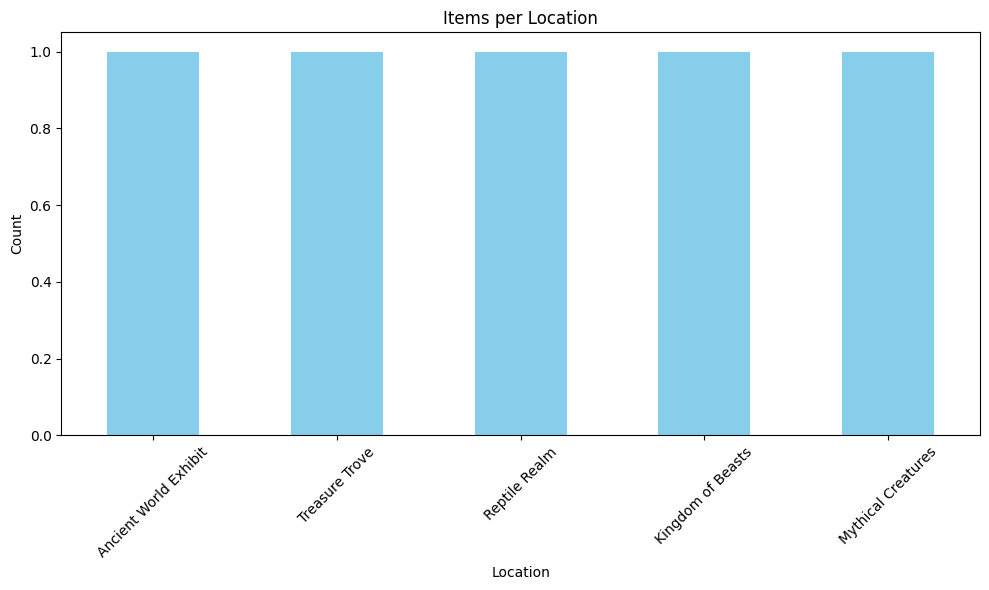

In [6]:
data3['Movement Date'] = pd.to_datetime(data3['Movement Date'])
location_counts = data3['Last Known Location'].value_counts()
suspicious_relocation = data3[data3['Description'] == 'Sculpture']['Last Known Location']
disappearance_date = data3[data3['Description'] == 'Sculpture']['Movement Date'].max()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Items per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Email Exchanges**

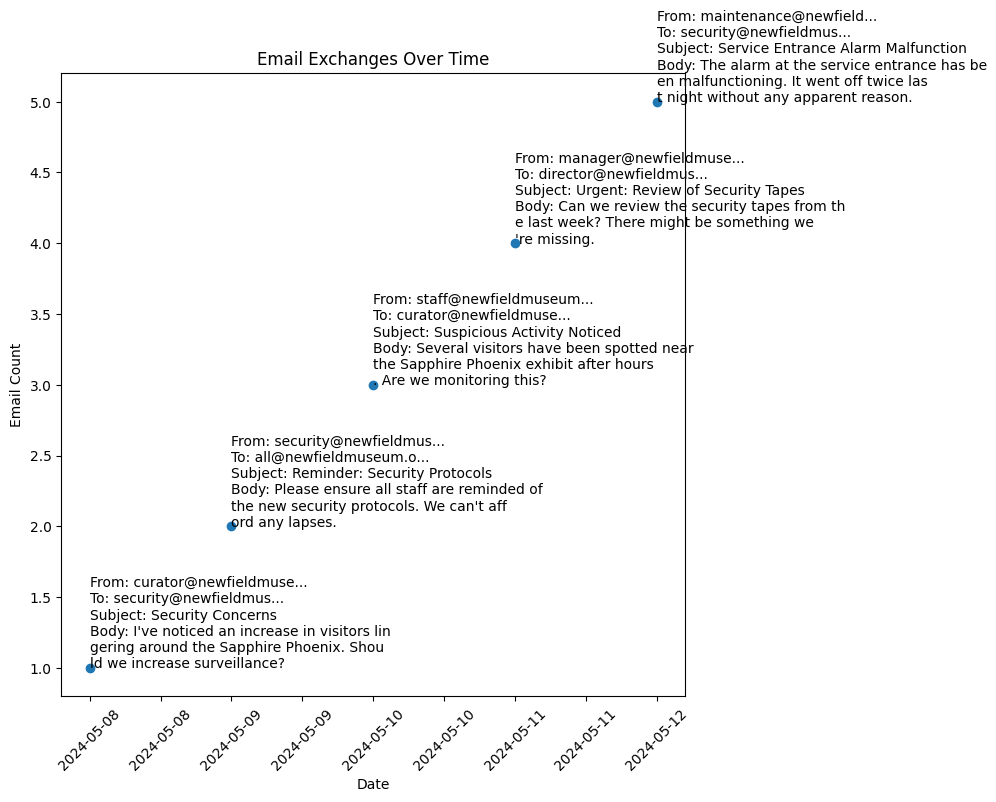

In [7]:
data4['Date'] = pd.to_datetime(data4['Date'])
data4.sort_values(by='Date', inplace=True)
plt.figure(figsize=(10, 8))
plt.scatter(data4['Date'], range(1, len(data4) + 1))
ax = plt.gca()
for idx, row in data4.iterrows():
    subject = (row['Subject'][:40] + '...') if len(row['Subject']) > 40 else row['Subject']
    to = (row['To'][:20] + '...') if len(row['To']) > 20 else row['To']
    from_ = (row['From'][:20] + '...') if len(row['From']) > 20 else row['From']
    body_lines = [row['Body'][i:i+40] for i in range(0, len(row['Body']), 40)]
    body = '\n'.join(body_lines)
    ax.text(row['Date'], idx + 1, f"From: {from_}\nTo: {to}\nSubject: {subject}\nBody: {body}", fontsize=10, color='black')
plt.xlabel('Date')
plt.ylabel('Email Count')
plt.title('Email Exchanges Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.show()